```{note}
The relevant packages were imported here (numpy, math, matplotlib), therefore no longer need importing in the next sections. But make sure you do import them if you are running some of the sections independently.
```

```{admonition} Discretisation tip
:class: tip
In the above example we allowed python to compute the grid points, by using linspace to ensure that the right-hand end point was included. However, for some applications it may not be convenient to use linspace.

If you want to compute the step size $h$ that will discretise a domain with the right-hand end point included, it is useful to recognise that the $x$ values in the grid are in arithmetic progression. If the first term is $a$, then the last term is $a+(n-1)h$, where $n$ is the number of points. This gives the following result for an interval $[a,b]$

\begin{equation}a+(n-1)h=b \quad \Rightarrow\quad h=\frac{b-a}{n-1}\end{equation}
```

# Initial value problems

Substitution of finite difference formulae into a differential equation results in a system of algebraic difference equations that either can be directly rearranged (this section) or solved using root-finding techniques (next section).

```{admonition} Numeric integration
:class: theorem
The use of geometric integral approximation formulae such as the left-hand rectangle rule, mid-point rectangle rule or Simpson’s rule can also be used for numeric integration of initial value problems. The results found this way are identical to the Taylor series formulae and the geometric arguments can help to motivate the methods. However, Taylor’s theorem is required to quantify the size of the analytic error in each case.
```

## Forward stepping
We can use the Euler forward difference formula to solve an initial value problem (IVP) of the form

\begin{equation}\frac{\mathrm{d}y}{\mathrm{d}x}=f(x), \quad y(x_0)=y_0.\end{equation}

Recalling that

$$y(x_k+h)= y(x_k)+y^{\prime}(x_k)h+\mathcal{O}(h^2)$$

and using the given differential equation to replace the derivative leads to the following iterative formula, which is known as the explicit Euler method

\begin{equation}y_{k+1}\simeq y_k + h f(x_k)\end{equation}

The formula uses the known value $(x_k,y_k)$ together with the known slope at that point to project forward to the next point. The calculation is then repeated at the new point, and in this manner we keep stepping forward until we reach the end of the integration domain. We start at the given initial value $(x_0,y_0)$.

A graphical illustration is provided below, demonstrating how each forward step takes us in tangent to one of the family of general solution curves. The approximation would be better for smaller step size!

```{image} images/forward1.png
:alt: forward stepping
:scale: 40%
:align: center
```

### Example

The below Python script uses the forward difference formula to obtain a numeric estimate of the solution to the problem

\begin{equation}\frac{\mathrm{d}y}{\mathrm{d}x}=\cos(x)+1, \quad y(-\pi)=-\pi\end{equation}

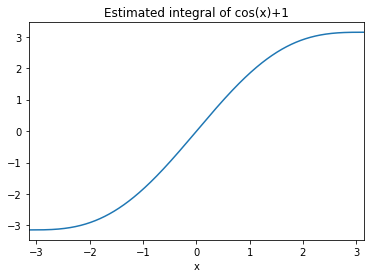

Maximum error: 0.006289469598703877


In [1]:
import numpy as np
import matplotlib.pyplot as plt

n=1000
h = 2*np.pi/(n-1)
x=np.zeros(n)
y=np.zeros(n)

x[[0]] = -np.pi
y[[0]] = -np.pi

for k in range(n-1):
    x[[k+1]] = x[k] + h
    y[[k+1]] = (y[k] + h*(np.cos(x[k])+1))

plt.plot(x,y)
plt.xlabel('x')
plt.xlim(-np.pi,np.pi)
plt.title('Estimated integral of cos(x)+1')
plt.show()

# Maximum error
y = np.array(y)
x = np.array(x)

exact=np.sin(x)+x
print('Maximum error:', max(abs(y-exact)))

### Predicting the size of the error

**Local error**

The trunctation error in the explicit Euler method is $\mathcal{O}(h^2)$. It is the size of error introduced at each step.

**Global error**

As we are integrating over $1/h$ steps, we may therefore expect that by the time we reach the end of the integration domain the error may be $\mathcal{O}(h)$.

This heuristic description is fairly accurate. However, the detailed picture is a little more complicated, as for some problems the local errors are amplified/compounded in subsequent steps, whilst in other problems the errors are damped out. We will see some examples in the next section.


```{exercie}
Edit the code given above using forward difference formula so that it uses the central difference formula

\begin{equation}y_{k+1}\simeq y_k + h y^{\prime}_{k+1/2}\end{equation}

You should find that the maximum error in your expansion is 1.6482e-06

**Hint** The solution to this question requires very,very minimal changes to the given code.
```

## Non-autonomous IVPs
So far we have only looked at initial value problems where the derivative is given fully in terms of $x$. Differential equations which do not explicitly depend on the independent variable are called autonomous.

We now consider the more general non-autonomous initial value problem given by:

\begin{equation}\frac{\mathrm{d}y}{\mathrm{d}x}=f(x,y), \quad y(x_0)=y_0.\end{equation}

Schemes for solving this problem based on the forward and backward difference formulae are given below, with some discussion of their stability properties. Some further formulae will be outlined in the chapter on multi-stage methods.


### Forward difference (explicit Euler scheme)

Substituting the given result for the derivative into the forward difference formula result in

\begin{equation}y(x_k+h)\simeq y(x_k)+h f(x_k,y_k)\end{equation}

This gives an explicit result for $y_{k+1}$ in terms of the values $x_k$ and $y_k$ from the previous step, which can be calculated straightforwardly in the same manner we used for the explicit problem. An example implementation is shown in the function code below

In [2]:
def my_eulr(f,x,y0):

    nstep = len(x)
    h = x[1]-x[0]
    y = [y0]

    for k in range(nstep-1):
        y.append(y[k]+h*f(x[k],y[k]))
    return y

Here is a demonstration of the solution using this code for the problem

\begin{equation}\frac{\mathrm{d}y}{\mathrm{d}x}=-y+(\cos(x)+2)y^2, \quad y(0)=0.4, \quad x\in[0,4]\end{equation}   $$

In [3]:
f = lambda x,y: -y+(cos(x)+2)*y**2
x = np.linspace(0,4,100)
y = my_eulr(f,x,0.4)
plt.plot(x,y, 'b')
plt.show()

NameError: name 'cos' is not defined

If you would like to compare this solution to the analytic result, it is given by

\begin{equation}\frac{2}{4+\cos(x)-\sin(x)}\end{equation}

<u>**Backward difference (implicit Euler scheme)**</u>

\begin{equation}y(x_k+h)\simeq y(x_k)+h f(x_k,y(x_k+h))\end{equation}

Here, things begin to get a bit more complicated, since the expression for $y_{k+1}$ is given implicitly. Usually it is not possible to rearrange the expression to obtain $y_{k+1}$ explicitly, so a root-finding algorithm is required, such as the Newton-Raphson technique or a bisection or fixed point algorithm. An example implementation is shown in the code below

In [ ]:
def my_eulri(f,x,y0):
    nstep = len(x)
    h = x[1]-x[0]
    y = [y0]

    for k in range(nstep-1):
        x2 = x[k+1]
        y1 = y[k]

        F = lambda y2: (y2-y1-h*f(x2, y2))
        y.append(fsolve(F,y1))

    return y

**<u>Trapezoidal rule</u>**

Taking the average of the forward and backward difference formulae gives

\begin{equation}y_{k+1}=y_k+\frac{h}{2}\biggr[f(x_k,y_k)+f(x_{k+1},y_{k+1})\biggr]\end{equation}

This result is equivalent to approximating the integral using the trapezium rule. It can be shown that the global error in this formula is $\mathcal{O}(h^2)$, whilst the global errors in the explicit and implicit Euler methods are both $\mathcal{O}(h)$.

The trapezoidal rule is also an implicit rule. It can be implemented using a minimal modification of the backward difference algorithm outlined above.

### Stability
The implicit Euler algorithm typically requires a root-solving algorithm (expensive) and it only offers the same order accuracy as the explicit Euler algorithm, since the error goes like $h$ in each case… So why do we need it?

We will consider an illustrative example, provided by the problem

\begin{equation}\frac{\mathrm{d}y}{\mathrm{d}x}=-5y, \quad y(0)=2, \quad y\in[0,10]\end{equation}

First, let us demonstrate the solutions obtained for step size $h=0.41$, using each algorithm:

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from scipy.optimize import fsolve

h = 0.41
x=np.arange(0,10,h)
f = lambda x,y: -5*y
ye = my_eulr(f,x,2)
yi = my_eulri(f,x,2)

xsol = np.linspace(0,10,1001)
ysol = 2*np.exp(-5*xsol)

fig,ax = plt.subplots(2,1)
ax[0].plot(x,ye,'b',xsol,ysol,'r')
ax[0].set_title('Explicit Method')
ax[0].set_xlim(0,10)
ax[1].plot(x, yi, 'b', xsol, ysol, 'r')
ax[1].set_title('Implicit Method')
ax[1].set_xlim(0,10)
fig.tight_layout()
plt.show()

In each plot, the numeric estimate is shown in blue and the analytic solution is shown in red.

Both the explicit and implicit Euler solutions have the same level of accuracy over a single step. However, in this example the errors in the explicit solution are amplified, whilst in the implicit solution they are damped. The implicit method is more stable for this example.

**<u>Analysis for this problem</u>**

This example can be fully analysed by hand. Since it is linear, a root finding method is not needed to implement the backward formula. We can simply rearrange to obtain an explicit solution for $y_k$. In both cases, the resulting expression for $y_{k+1}$ can be applied recursively to obtain a closed form discrete solution in terms of the step size $h$ and the initial condition $y_0$. The details for each method are shown below.

The **explicit formula** gives

$$\displaystyle y_{k+1}= (1-5h)y_k \quad \Rightarrow \quad y_{k+1}=(1-5h)^{k+1}y_0, \qquad x=kh$$

The **implicit formula** gives

$$\displaystyle y_{k+1}=\frac{y_k}{1+5h} \quad \Rightarrow \quad y_{k+1}=\frac{y_0}{(1+5h)^{k+1}}, \qquad x=kh$$

Since $\displaystyle \lim_{h\rightarrow 0}(1\pm 5 h)^{x/h} = e^{\pm 5x}$, both of these results converge to the analytic solution $y=2e^{-5x}$ in the limit of small step sizes.

However, for $|1-5h|>1$, the explicit Euler method displays oscillating growth (i.e. for $h>2/5$).

In general, for (dynamically) stable ODEs with a fast decaying or highly oscillatory mode, the explicit Euler method demands small step sizes. These types of ODE are called "stiff". The implicit Euler method is also more stable than the trapezoidal method.

**How is stability assessed in practical problems?**

Comparison of the local and global errors can give us an indication of the stability properties of the algorithm. The local errors generally ought to remain proportional to the size of the neglected terms in the truncated expansion. If these errors are growing then the algorithm is not stable.

The size of the error at each step depends on the method used and also the problem being solved. In particular, it depends on how large the gradient is. To account for this, and to produce a reliable result within specified error tolerances, many algorithms use adaptive step size methods, in which the error is estimated at each step by comparing the results from algorithms with different numbers of stages. The step size can then be decreased in regions where the tolerance would be exceeded. Python scipy package offers a built-in algorithm that does exactly this, called integrate.solve_ivp

## <span style="color: red;">Coding challenge</span>
As an alternative to using Newton-Raphson algorithm to find the root of an algebraic relationship, we can use a fixed-point iteration technique, designed for problems of the form \begin{equation}x=F(x).\end{equation}

The approach proceeds by taking an initial guess $x=x_{guess}$ and substituting it into the right hand side of the equation.

If $|x_{guess}-F(x_{guess})|$ is less than some specified tolerance then we conclude that our guess is a good approximation to the root.

If the tolerance goal is not met, we use the result $F(x_{guess})$ as a new guess, and repeat the process.

Write your own code to find a root of $x=\cos(x)$, with an initial guess of $x=0.2$, with a tolerance of $10^{-7}$.

Can you produce a plot showing the errors in each iteration?

```{note}
Fixed point techniques are an important numerical analysis tool, and we will use them more when we study applications to partial differential equations.
```

---

## Explicit vs implicit methods

```{admonition} Big idea : Stiffness and stability
:class: tip
Explicit algorithms tend to be easier to implement than implicit algorithms, and are less computationally demanding for a given step size.

Implicit algorithms tend to exhibit better stability properties, which is particularly important for problems which are numerically "stiff".
```